In [660]:
from bs4 import BeautifulSoup
import requests
import xlsxwriter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

In [546]:
urls = ["https://www.skinnytaste.com/dry-brine-turkey/", 
        "https://www.skinnytaste.com/stuffed-turkey-breast-with-cranberry-stuffing/", 
        "https://www.skinnytaste.com/slow-cooker-butternut-pear-soup/", 
        "https://www.skinnytaste.com/parmesan-hasselback-sweet-potatoes-with/",
        "https://www.skinnytaste.com/lightened-up-green-bean-casserole-with/",
        "https://www.skinnytaste.com/smashed-sweet-potatoes/",
        "https://www.skinnytaste.com/roasted-honeynut-squash/", 
        "https://www.skinnytaste.com/pumpkin-pie-dip/",
        "https://www.skinnytaste.com/skinny-pumpkin-spiced-snickerdoodles/", 
        "https://www.skinnytaste.com/roasted-seasoned-winter-squash-medley/",
        "https://www.skinnytaste.com/mixed-baby-greens-with-pecans/", 
        "https://www.skinnytaste.com/stuffed-mushrooms-with-broccoli-rabe-and-sausage/", 
        "https://www.skinnytaste.com/cacio-e-pepe-brussels-sprouts/", 
        "https://www.skinnytaste.com/open-faced-turkey-melts/", 
        "https://www.skinnytaste.com/pumpkin-ginger-soup/", 
        "https://www.skinnytaste.com/butternut-squash-mac-and-cheese/", 
        "https://www.skinnytaste.com/baked-spaghetti-squash-0-pts/", 
        "https://www.skinnytaste.com/stuffing-muffins/", 
        "https://www.skinnytaste.com/baked-turkey-croquettes/", 
        "https://www.skinnytaste.com/skinny-scalloped-potato-gratin/", 
        "https://www.skinnytaste.com/mashed-sweet-potatoes-brulee/", 
        "https://www.skinnytaste.com/air-fryer-turkey-breast/",
        "https://www.skinnytaste.com/cranberry-pear-sauce/",
        "https://www.skinnytaste.com/prosciutto-wrapped-figs-with-blue-cheese/", 
        "https://www.skinnytaste.com/roasted-asparagus-0-pts/", 
        "https://www.skinnytaste.com/creamy-cauliflower-puree/",
        "https://www.skinnytaste.com/potato-and-green-bean-salad-325-pts/", 
        "https://www.skinnytaste.com/apricot-rum-glazed-spiral-ham/",
        "https://www.skinnytaste.com/string-bean-salad-2-pts/",
        "https://www.skinnytaste.com/leftover-turkey-pot-pie-empanadas/"]

In [547]:
workbook = xlsxwriter.Workbook('SkinnyTaste.xlsx')
worksheet = workbook.add_worksheet()

In [548]:
row = 0
col = 0

worksheet.write_string(row, col, 'ID')
worksheet.write_string(row, col+1, 'name')
worksheet.write_string(row, col+2, 'image')
worksheet.write_string(row, col+3, 'calories')
worksheet.write_string(row, col+4, 'blue_points')
worksheet.write_string(row, col+5, 'green_points')
worksheet.write_string(row, col+6, 'purple_points')
worksheet.write_string(row, col+7, 'summary')
worksheet.write_string(row, col+8, 'recepie_key')

0

In [550]:
ID = 0
for j in urls:
    source = requests.get(j).text
    soup=BeautifulSoup(source,'lxml')

    for all_var in soup.find_all('div', class_="col span_10 clr span_content"):

        ID = ID+1
        print(ID)

        name = all_var.find("h1").text
        print(name)

        image = all_var.find("h2")
        image = image.find("img")['src']
        print(image)

        calories = all_var.find("span", class_="icon-star").text
        calories = calories.replace('Calories', '')
        print(calories)

        blue_points= all_var.find("span", class_="smart-points blue").text
        print(blue_points)

        green_points = all_var.find("span", class_="smart-points green").text
        print(green_points)

        purple_points=all_var.find("span",class_="smart-points purple").text
        print(purple_points)

        summary = soup.find("div", id="content").p.text
        print(summary)

        for all_var in soup.find("div", class_="icons nopin"):
            recepie_key = all_var.img['alt']
            print(recepie_key)

            row = row+1 
            worksheet.write(row, col, ID)
            worksheet.write(row, col+1, name)
            worksheet.write(row, col+2, image)
            worksheet.write(row, col+3, calories)
            worksheet.write(row, col+4, blue_points)
            worksheet.write(row, col+5, green_points)
            worksheet.write(row, col+6, purple_points)
            worksheet.write(row, col+7, summary)
            worksheet.write(row, col+8, recepie_key)

workbook.close()

1
Herb and Salt-Rubbed Dry Brine Turkey
https://www.skinnytaste.com/wp-content/uploads/2019/11/dry-brine-turkey-9.jpg
225 
0
2
0
This Herb and Salt-Rubbed Dry Brined Turkey comes out so moist and flavorful, with crispy golden skin and juicy tender meat.
Gluten Free
Keto Recipes
Kid Friendly
Low Carb
2
Stuffed Turkey Breast with Cranberry Stuffing
https://www.skinnytaste.com/wp-content/uploads/2020/10/Stuffed-Turkey-Breast-with-Cranberry-Stuffing-11.jpg
484 
9
9
9
Stuffed Turkey Breast with Cranberry Stuffing and gravy – the perfect Thanksgiving meal for this year’s holiday.
Kid Friendly
3
Slow Cooker Butternut Pear Soup
https://www.skinnytaste.com/wp-content/uploads/2020/11/Slow-Cooker-Butternut-Pear-5.jpg
132 
2
2
2
This Slow Cooker Butternut Pear Soup with a hint of ginger is vegan and dairy-free and so simple to make. Great as a starter or serve it as a meal with a salad or a sandwich.
Dairy Free
Freezer Meals
Gluten Free
Slow Cooker Recipes
Vegetarian Meals
4
Parmesan Hasselback Sw

In [957]:
#Data Visualization
file = pd.read_excel("SkinnyTaste.xlsx")
print(file)

     ID                                           name  \
0     1          Herb and Salt-Rubbed Dry Brine Turkey   
1     1          Herb and Salt-Rubbed Dry Brine Turkey   
2     1          Herb and Salt-Rubbed Dry Brine Turkey   
3     1          Herb and Salt-Rubbed Dry Brine Turkey   
4     2  Stuffed Turkey Breast with Cranberry Stuffing   
..   ..                                            ...   
104  29                               Green Bean Salad   
105  29                               Green Bean Salad   
106  29                               Green Bean Salad   
107  30              Leftover Turkey Pot Pie Empanadas   
108  30              Leftover Turkey Pot Pie Empanadas   

                                                 image  calories  blue_points  \
0    https://www.skinnytaste.com/wp-content/uploads...       225            0   
1    https://www.skinnytaste.com/wp-content/uploads...       225            0   
2    https://www.skinnytaste.com/wp-content/uploads...      

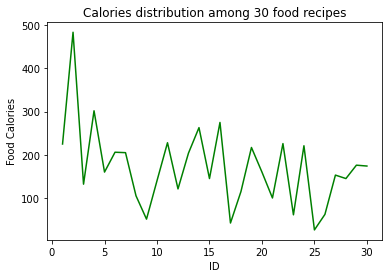

In [958]:
#Data Vizualization Part

#Calories distribution among 30 food recipes

plt.plot(file.ID, file.calories, color='g')
plt.title('Calories distribution among 30 food recipes')
plt.xlabel('ID')
plt.ylabel('Food Calories')
plt.axis('tight');

#max(file.calories) = 484


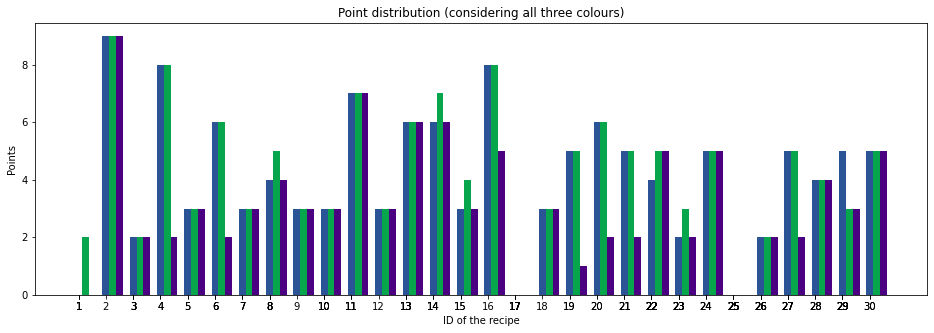

In [959]:
#Point distribution (considering all three colours)
plt.figure(figsize=(16, 5))
barWidth=0.25

plt.bar(file.ID+0.00, file.blue_points, width=barWidth, color = "#2a5495")
plt.bar(file.ID+0.25, file.green_points, width=barWidth, color = "#07a64c")
plt.bar(file.ID+0.50, file.purple_points, width=barWidth, color = "#4B0082")
plt.xticks(file.ID)
plt.xlabel("ID of the recipe")
plt.ylabel("Points")
plt.title("Point distribution (considering all three colours)")
plt.show()

In [960]:
lb_make = LabelEncoder()
file["key_code"] = lb_make.fit_transform(file["recepie_key"])

In [961]:
#Recepie key frequency

RK = Counter(file['recepie_key'])
RK

Counter({'Gluten Free': 23,
         'Keto Recipes': 7,
         'Kid Friendly': 18,
         'Low Carb': 8,
         'Dairy Free': 9,
         'Freezer Meals': 1,
         'Slow Cooker Recipes': 1,
         'Vegetarian Meals': 19,
         'Under 30 Minutes': 10,
         'Whole 30 Recipes': 6,
         'Paleo': 4,
         'Air Fryer': 3})

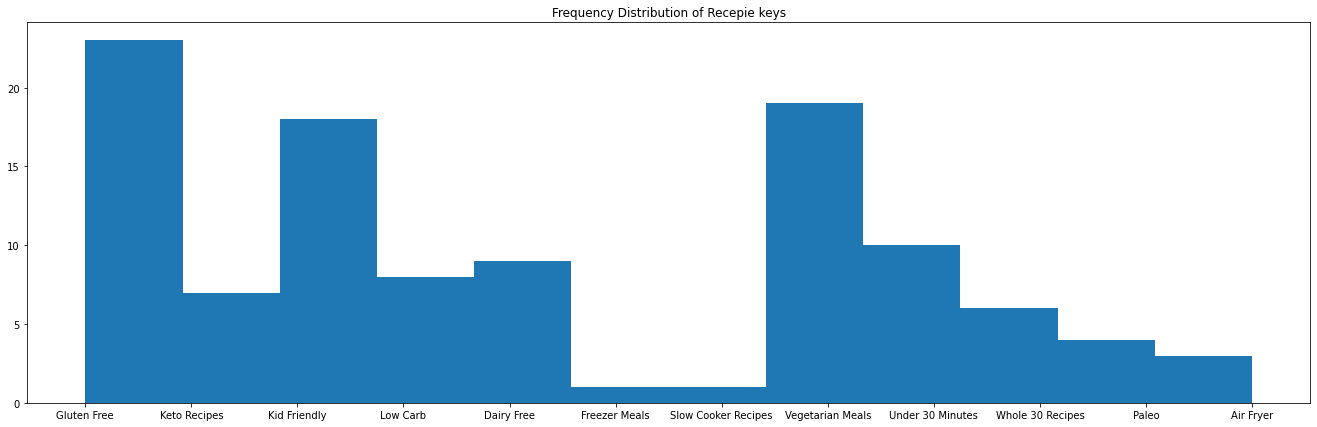

In [962]:
#Recepie key distribution

plt.figure(figsize=(23, 7))

plt.hist(file['recepie_key'], bins = 12)
plt.title("Frequency Distribution of Recepie keys");


In [963]:
# Remove certain columns and duplicated rows and save to OUT

OUT = file.drop(columns = ['key_code','recepie_key'])
OUT = OUT.drop_duplicates()
OUT

,ID,name,image,calories,blue_points,green_points,purple_points,summary
0,1,Herb and Salt-Rubbed Dry Brine Turkey,https://www.skinnytaste.com/wp-content/uploads...,225,0,2,0,This Herb and Salt-Rubbed Dry Brined Turkey co...
4,2,Stuffed Turkey Breast with Cranberry Stuffing,https://www.skinnytaste.com/wp-content/uploads...,484,9,9,9,Stuffed Turkey Breast with Cranberry Stuffing ...
5,3,Slow Cooker Butternut Pear Soup,https://www.skinnytaste.com/wp-content/uploads...,132,2,2,2,This Slow Cooker Butternut Pear Soup with a hi...
10,4,Parmesan Hasselback Sweet Potatoes with Balsam...,https://www.skinnytaste.com/wp-content/uploads...,302,8,8,2,These hasselback sweet potatoes are sliced and...
12,5,Lightened Up Green Bean Casserole,https://www.skinnytaste.com/wp-content/uploads...,160,3,3,3,"This holiday season enjoy a lighter, healthier..."
14,6,Smashed Sweet Potatoes,https://www.skinnytaste.com/wp-content/uploads...,206,6,6,2,"Smashed Sweet Potatoes, seasoned with thyme ar..."
17,7,Roasted Honeynut Squash with Maple and Pecans,https://www.skinnytaste.com/wp-content/uploads...,205,3,3,3,Roasted Roasted Honeynut Squash with Maple and...
20,8,Pumpkin Pie Dip,https://www.skinnytaste.com/wp-content/uploads...,105,4,5,4,Pumpkin Pie Dip is everything you love about p...
24,9,Skinny Pumpkin Snickerdoodles,https://www.skinnytaste.com/wp-content/uploads...,51,3,3,3,These Skinny Pumpkin Snickerdoodle cookies sho...
25,10,Roasted Seasoned Winter Squash Medley,https://www.skinnytaste.com/wp-content/uploads...,140,3,3,3,Roasted Seasoned Winter Squash Medley is seaso...


In [1405]:
#Function


#Input
cal_range_min = int(input("Enter the MINIMUM calorie intake:"))
cal_range_max = int(input("Enter the MAXIMUM calorie intake:"))
blue = int(input("Enter the number of blue points:"))
green = int(input("Enter the number of green points:"))
purple = int(input("Enter the number of purple points:"))

#Sort
output = OUT[(OUT['calories'] > cal_range_min) & (OUT['calories'] < cal_range_max)]
output = output.sort_values(by=['calories'])
output = output[(output['blue_points'] >= blue) & (output['green_points'] >= green) & (output['purple_points'] >= purple)]
output = output.iloc[0:5]
output = output[['name', 'image', 'calories', 'blue_points', 'green_points', 'purple_points', 'summary']]
output


Enter the MINIMUM calorie intake:123
Enter the MAXIMUM calorie intake:233
Enter the number of blue points:4
Enter the number of green points:4
Enter the number of purple points:4


,name,image,calories,blue_points,green_points,purple_points,summary
97,Apricot-Rum Glazed Spiral Ham,https://www.skinnytaste.com/wp-content/uploads...,145,4,4,4,Apricot-Rum Glazed Spiral Ham is perfect for t...
107,Leftover Turkey Pot Pie Empanadas,https://www.skinnytaste.com/wp-content/uploads...,174,5,5,5,"These Leftover Turkey Pot Pie Empanadas, or ha..."
34,Cacio e Pepe Brussels Sprouts,https://www.skinnytaste.com/wp-content/uploads...,204,6,6,6,Cacio e Pepe Brussels Sprouts swaps out pasta ...
74,Prosciutto Wrapped Figs with Blue Cheese (Gril...,https://www.skinnytaste.com/wp-content/uploads...,221,5,5,5,Prosciutto Wrapped Figs with Blue Cheese serve...
60,Air Fryer Turkey Breast,https://www.skinnytaste.com/wp-content/uploads...,226,4,5,5,Air Fryer Turkey Breast comes out so moist and...


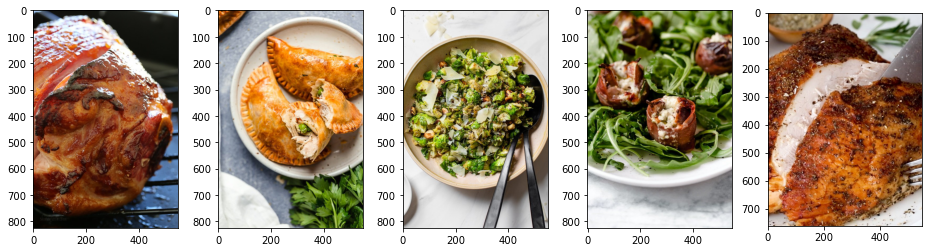

In [1406]:
#Open image from URL

from PIL import Image
import requests
import matplotlib.pyplot as plt

fig = plt.figure() 
fig.set_figwidth(16) 

indx_length=len(output.name)

for i in range(1,indx_length+1):
      
    fig.add_subplot(1, indx_length, i)
    url = output.image.iloc[i-1]
    response = requests.get(url, stream=True)
    img = Image.open(response.raw)
    plt.imshow(img)
